In [2]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
file ='TPS_27.las'

In [5]:
data=np.loadtxt(file,skiprows=2)
data[data<0]=np.nan
mnemonic =['DEPTH','NGAM','CALP','LSD','HRD']
data = pd.DataFrame(data,columns=mnemonic)
data =data[['DEPTH','NGAM','CALP','LSD','HRD']]


In [6]:
data

,DEPTH,NGAM,CALP,LSD,HRD
0,1.76,42.65,1.43,6026.62,7659.56
1,1.77,40.88,1.43,5856.76,7602.94
2,1.78,40.15,1.43,5667.94,7515.88
3,1.79,40.15,1.43,5460.88,7425.44
4,1.80,37.94,1.43,5297.65,7371.32
...,...,...,...,...,...
10273,104.49,NaN,NaN,NaN,NaN
10274,104.50,NaN,NaN,NaN,NaN
10275,104.51,NaN,NaN,NaN,NaN
10276,104.52,NaN,NaN,NaN,NaN


In [7]:
data.keys()

Index(['DEPTH', 'NGAM', 'CALP', 'LSD', 'HRD'], dtype='object')

#       Mnemonic unit
#------------------------------------------------------------------------------
 DEPTH.M                                 :   0     Depth
 NGAM.CPS                                :   1     Natural Gamma
 CALP.INCH                               :   2     Borehole Diameter
 LSD.CPS                                 :   3     Long Spacing Density
 HRD.CPS                                 :   4     High Resolution Density
#------------------------------------------------------------------------------

In [8]:
depth = data['DEPTH']
ngam = data['NGAM']
calp = data['CALP']
lsd = data['LSD']
hrd = data['HRD']

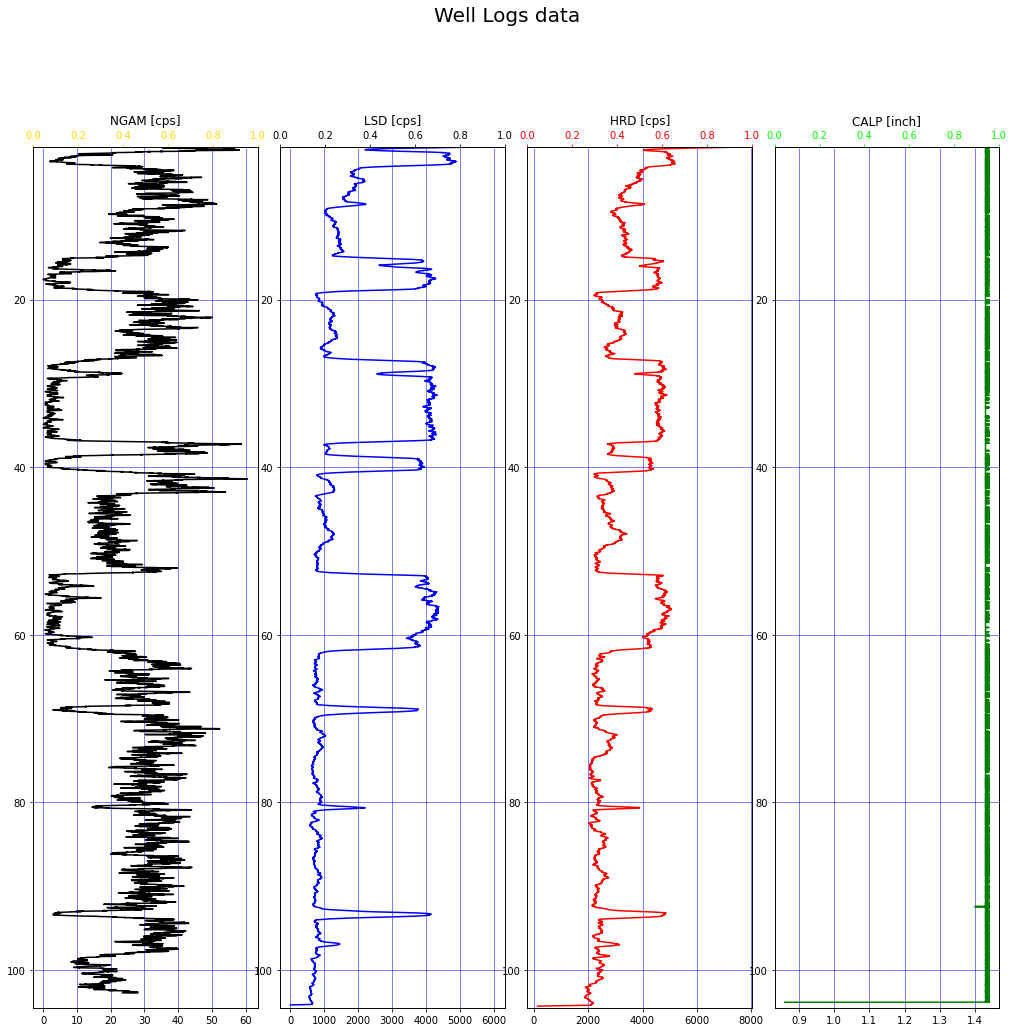

In [164]:
plt.figure(figsize=(15,15))

plt.suptitle('Well Logs data', size=20)
plt.subplot(1,4,1)
plt.plot(ngam, depth, color='black')
plt.ylim(max(depth), min(depth))
plt.title('NGAM [cps]')
plt.grid(which='major',linestyle='-',linewidth=0.5,color='blue')
plt.grid(which='minor',linestyle=':',linewidth=0.5,color='blue')
plt.twiny()
plt.tick_params(axis='x', colors='gold')

plt.subplot(1,4,2)
plt.plot(lsd, depth, color='blue')
plt.ylim(max(depth), min(depth))
plt.title('LSD [cps]')
plt.grid(which='major',linestyle='-',linewidth=0.5,color='blue')
plt.grid(which='minor',linestyle=':',linewidth=0.5,color='blue')
plt.twiny()
plt.tick_params(axis='x', colors='black')


plt.subplot(1,4,3)
plt.plot(hrd, depth, color='red')
plt.ylim(max(depth), min(depth))
plt.title('HRD [cps]')
plt.grid(which='major',linestyle='-',linewidth=0.5,color='blue')
plt.grid(which='minor',linestyle=':',linewidth=0.5,color='blue')
plt.twiny()
plt.tick_params(axis='x', colors='red')

plt.subplot(1,4,4)
plt.plot(calp, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('CALP [inch]')
plt.grid(which='major',linestyle='-',linewidth=0.5,color='blue')
plt.grid(which='minor',linestyle=':',linewidth=0.5,color='blue')
plt.twiny()
plt.tick_params(axis='x', colors='lime')


# set space between logs
plt.tight_layout(4)
plt.subplots_adjust(top=0.85,wspace=0.1)

plt.show()

In [72]:
p = np.linspace(30,30,10278)

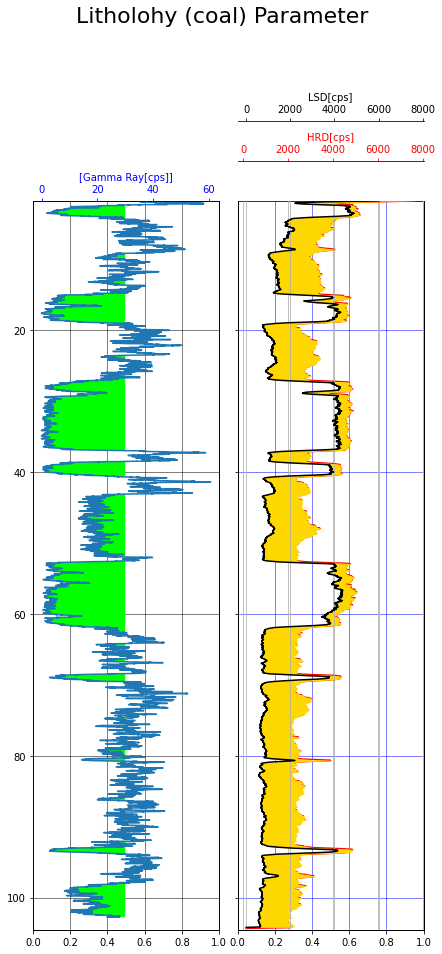

In [166]:
for axes in ax:
    axes.set_ylim (max(depth), min(depth))
    axes.invert_yaxis()
    axes.yaxis.grid(True)
    axes.get_xaxis().set_visible(False) 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,15), sharey=True)
fig.suptitle("Litholohy (coal) Parameter", fontsize=22)
fig.subplots_adjust(top=0.8,wspace=0.1)

ax01=ax[0].twiny()
ax01.set_ylim(max(depth), min(depth))
ax01.spines['top'].set_position(('outward',0))
ax01.set_xlabel("Gamma Ray[cps]")
ax01.plot(ngam,depth,label='Gamma Ray [cps]')
ax01.set_xlabel('[Gamma Ray[cps]]',color='blue')    
ax01.tick_params(axis='x', colors='blue')
ax[0].grid(which='major',linestyle='-',linewidth=0.5,color='black')
ax[0].grid(which='minor',linestyle=':',linewidth=0.5,color='black')
ax[0].grid(True)
m1 = data['NGAM']
mud_line = m1*0+30
plt.fill_betweenx(data['DEPTH'],m1,mud_line, where=(m1<mud_line),color='lime',linewidth=0)


ax11=ax[1].twiny()
ax11.set_ylim(max(depth), min(depth))
ax11.grid(True)
ax11.spines['top'].set_position(('outward',40))
ax11.set_xlabel('HRD[cps]',color='red')   
ax11.plot(hrd,depth,label='HRD[cps]',color='red')
ax11.tick_params(axis='x', colors='red')

ax12=ax[1].twiny()
ax12.set_ylim(max(depth), min(depth))
ax12.grid(True)
ax12.spines['top'].set_position(('outward',80))
ax12.set_xlabel('LSD[cps]',color='black')   
ax12.plot(lsd,depth,label='LSD[cps]',color='black')
ax12.tick_params(axis='x', colors='black')

ax[1].grid(which='major',linestyle='-',linewidth=0.5,color='blue')
ax[1].grid(which='minor',linestyle=':',linewidth=0.5,color='blue')
ax[1].grid(True)
l1 = data['LSD']
l2 = data['HRD']
plt.fill_betweenx(data['DEPTH'],l1,l2, where=(l2>l1),color='gold',linewidth=0)

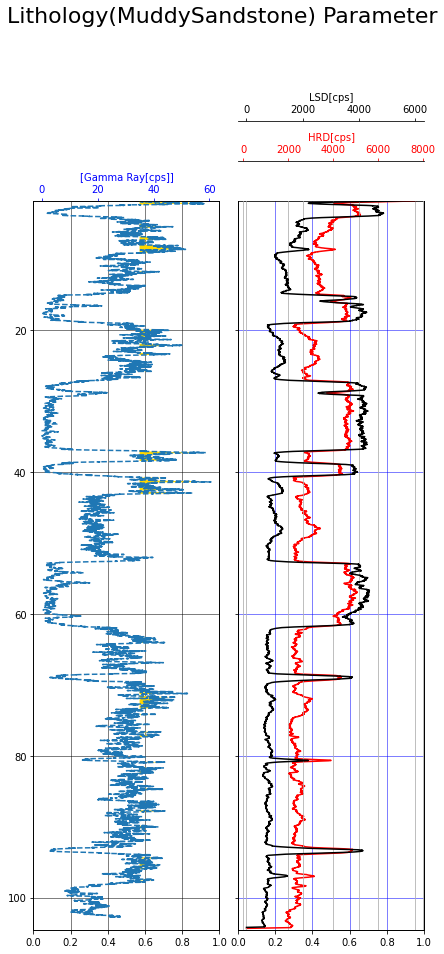

In [170]:
for axes in ax:
    axes.set_ylim (max(depth), min(depth))
    axes.invert_yaxis()
    axes.yaxis.grid(True)
    axes.get_xaxis().set_visible(False) 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,15), sharey=True)
fig.suptitle("Lithology(MuddySandstone) Parameter", fontsize=22)
fig.subplots_adjust(top=0.8,wspace=0.1)

ax01=ax[0].twiny()
ax01.set_ylim(max(depth), min(depth))
ax01.spines['top'].set_position(('outward',0))
ax01.set_xlabel("Gamma Ray[cps]")
ax01.plot(ngam,depth,'--',label='Gamma Ray [cps]')
ax01.set_xlabel('[Gamma Ray[cps]]',color='blue')    
ax01.tick_params(axis='x', colors='blue')

ax[0].grid(which='major',linestyle='-',linewidth=0.5,color='black')
ax[0].grid(which='minor',linestyle=':',linewidth=0.5,color='black')
ax[0].grid(True)
m1 = data['NGAM']
mud_line = m1*0+35
plt.fill_betweenx(data['DEPTH'],m1,mud_line, where=(m1>=mud_line),color='gold',linewidth=0)


ax11=ax[1].twiny()
ax11.set_ylim(max(depth), min(depth))
ax11.grid(True)
ax11.spines['top'].set_position(('outward',40))
ax11.set_xlabel('HRD[cps]',color='red')   
ax11.plot(hrd,depth,label='HRD[cps]',color='red')
ax11.tick_params(axis='x', colors='red')

ax12=ax[1].twiny()
ax12.set_ylim(max(depth), min(depth))
ax12.grid(True)
ax12.spines['top'].set_position(('outward',80))
ax12.set_xlabel('LSD[cps]',color='black')   
ax12.plot(lsd,depth,label='LSD[cps]',color='black')
ax12.tick_params(axis='x', colors='black')

ax[1].grid(which='major',linestyle='-',linewidth=0.5,color='blue')
ax[1].grid(which='minor',linestyle=':',linewidth=0.5,color='blue')
ax[1].grid(True)

l1 = data['LSD']
l2 = data['HRD']
plt.fill_betweenx(data['DEPTH'],l1,l2, where=(l1>l2),color='green',linewidth=0)

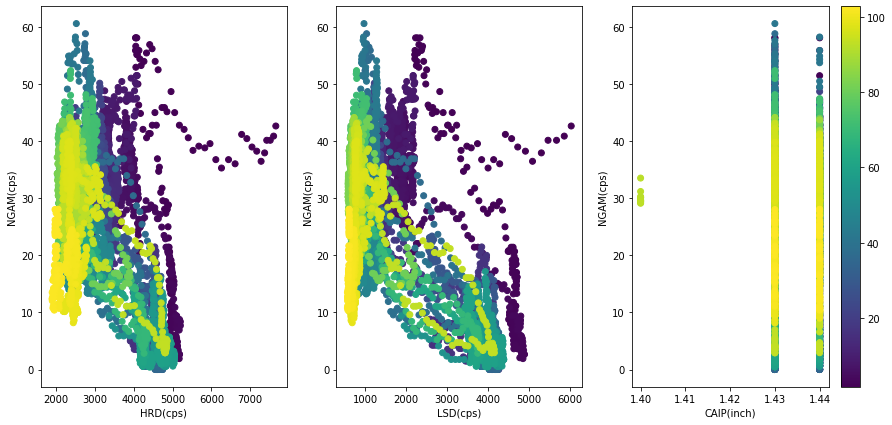

In [165]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
plt.scatter(hrd, ngam, c=depth)
plt.xlabel('HRD(cps)')
plt.ylabel('NGAM(cps)')

plt.subplot(1,3,2)
plt.scatter(lsd, ngam, c=depth)
plt.xlabel('LSD(cps)')
plt.ylabel('NGAM(cps)')

plt.subplot(1,3,3)
plt.scatter(calp, ngam, c=depth)
plt.xlabel('CAlP(inch)')
plt.ylabel('NGAM(cps)')

plt.colorbar()
plt.show()

In [167]:
p = np.linspace(3,3,10278)

In [168]:
p

array([3., 3., 3., ..., 3., 3., 3.])

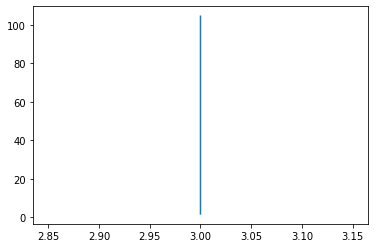

In [169]:
plt.plot(p,depth)